# P450 Classification model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tdc.single_pred import ADME
import pickle
import numpy as np
from tdc.single_pred import Tox

In [3]:

data = ADME(name = 'CYP2C19_Veith')
df = data.get_data()

Found local copy...
Loading...
Done!


In [4]:
df.to_csv('Raw_data_Cyp450.csv', index= False)
df

,Drug_ID,Drug,Y
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0
1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
2,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
4,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
...,...,...,...
12660,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
12661,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
12662,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...,1
12663,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


### Data Preprocessing

Before executing the code block:
Current CPU Usage: 8.7%
Current RAM Usage: 30.4%



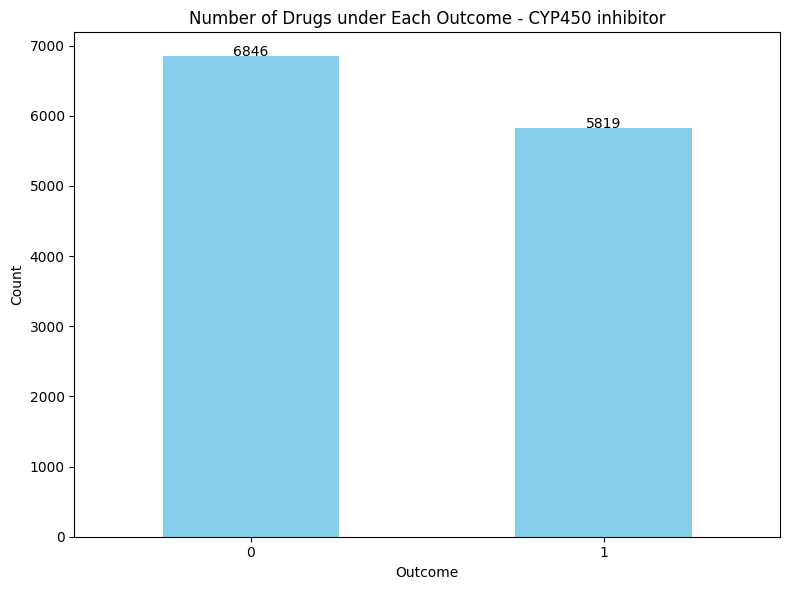

Number of duplicate Drug_IDs: 0
Number of duplicate Drugs: 0

Number of rows after preprocessing: 12665
Number of columns after preprocessing: 3

After executing the code block:
Current CPU Usage: 40.1%
Current RAM Usage: 30.5%



In [5]:
import psutil
import matplotlib.pyplot as plt
import pandas as pd

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Plot number of drugs under each outcome (Y)
plt.figure(figsize=(8, 6))
ax = df['Y'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Drugs under Each Outcome - CYP450 inhibitor')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.tight_layout()
plt.show()

# Check for duplicate Drug_ID and Drug
duplicate_ids = df.duplicated(subset=['Drug_ID']).sum()
duplicate_drugs = df.duplicated(subset=['Drug']).sum()

print(f"Number of duplicate Drug_IDs: {duplicate_ids}")
print(f"Number of duplicate Drugs: {duplicate_drugs}")

# Drop rows with empty Drug and Outcome (Y)
df.dropna(subset=['Drug', 'Y'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Print number of rows and columns after preprocessing
num_rows, num_cols = df.shape
print(f"\nNumber of rows after preprocessing: {num_rows}")
print(f"Number of columns after preprocessing: {num_cols}")

# Save preprocessed data to CSV file
df.to_csv('preprocessed_CYP450.csv', index=False)

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()



## Fingerprint Coversion

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Drop the Drug_ID column
df.drop(columns=['Drug_ID'], inplace=True)

# Convert Drug column into Morgan fingerprints
def mol_to_fp(mol):
    try:
        mol = Chem.MolFromSmiles(mol)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)
            return list(fp)
        else:
            return [None]*2048
    except:
        return [None]*2048

# Apply the mol_to_fp function to each Drug molecule
df['Morgan_FP'] = df['Drug'].apply(mol_to_fp)

# Convert the list of bits in Morgan_FP to separate columns
df_morgan = pd.DataFrame(df['Morgan_FP'].tolist(), columns=[f'Bit_{i+1}' for i in range(2048)])

# Concatenate the Morgan fingerprint columns with the Y column
df_final = pd.concat([df_morgan, df['Y']], axis=1)

# Drop rows with any NaN values (failed conversions)
df_final.dropna(inplace=True)

# Save the final DataFrame to CSV
df_final.to_csv('Morgan_CYP450.csv', index=False)

# Display the first few rows of the final DataFrame
print(df_final.head())

# Display the number of rows and columns after processing
num_rows, num_cols = df_final.shape
print(f"\nNumber of rows after processing: {num_rows}")
print(f"Number of columns after processing: {num_cols}")

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()


Before executing the code block:
Current CPU Usage: 4.1%
Current RAM Usage: 29.5%

   Bit_1  Bit_2  Bit_3  Bit_4  Bit_5  Bit_6  Bit_7  Bit_8  Bit_9  Bit_10  ...  \
0      0      0      0      0      0      0      0      0      0       0  ...   
1      0      0      0      0      0      0      0      0      0       0  ...   
2      0      1      0      0      0      0      0      0      0       0  ...   
3      0      1      0      0      0      0      0      0      0       0  ...   
4      0      0      0      0      0      0      0      0      0       0  ...   

   Bit_2040  Bit_2041  Bit_2042  Bit_2043  Bit_2044  Bit_2045  Bit_2046  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0    

In [7]:
import pandas as pd
import pickle
import psutil
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Load the preprocessed data
df_final = pd.read_csv('Morgan_CYP450.csv')

# Split the data into features and target
X = df_final.drop(columns=['Y'])
y = df_final['Y']

# Print shape of the data before feature selection
print(f"Shape of data before feature selection: {X.shape}")

# Remove features with low variance using VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Print selected feature names
print(f"Selected features: {selected_feature_names}")

# Print shape of the data after feature selection
print(f"Shape of data after feature selection: {X_selected.shape}")

# Split the selected features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize ExtraTreesClassifier
rf_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained ExtraTreesClassifier to a .pkl file
with open('ETC_model_selected_features.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

# Save selected feature names to a text file
with open('selected_features_Cyp450.txt', 'w') as file:
    for feature in selected_feature_names:
        file.write(f"{feature}\n")

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()


Before executing the code block:
Current CPU Usage: 4.6%
Current RAM Usage: 35.1%

Shape of data before feature selection: (12665, 2048)
Selected features: Index(['Bit_2', 'Bit_3', 'Bit_5', 'Bit_6', 'Bit_8', 'Bit_9', 'Bit_10',
       'Bit_12', 'Bit_13', 'Bit_14',
       ...
       'Bit_2037', 'Bit_2038', 'Bit_2039', 'Bit_2041', 'Bit_2042', 'Bit_2043',
       'Bit_2044', 'Bit_2045', 'Bit_2046', 'Bit_2047'],
      dtype='object', length=1650)
Shape of data after feature selection: (12665, 1650)

Accuracy: 81.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1370
           1       0.78      0.83      0.80      1163

    accuracy                           0.81      2533
   macro avg       0.81      0.81      0.81      2533
weighted avg       0.82      0.81      0.81      2533


Confusion Matrix:
[[1092  278]
 [ 195  968]]

After executing the code block:
Current CPU Usage: 15.9%
Current RAM Usage: 39.7%



In [6]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Load the preprocessed data
df_final = pd.read_csv('Morgan.csv')

# Split the data into features and target
X = df_final.drop(columns=['Y'])
y = df_final['Y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyClassifier
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance metrics for each model
print(models)

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()


 97%|█████████▋| 28/29 [08:55<00:25, 25.88s/it]

[LightGBM] [Info] Number of positive: 4656, number of negative: 5476
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6144
[LightGBM] [Info] Number of data points in the train set: 10132, number of used features: 2048
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459534 -> initscore=-0.162218
[LightGBM] [Info] Start training from score -0.162218


100%|██████████| 29/29 [08:57<00:00, 18.53s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.81               0.82     0.82      0.82   
NuSVC                              0.81               0.81     0.81      0.81   
SVC                                0.81               0.81     0.81      0.81   
RandomForestClassifier             0.81               0.81     0.81      0.81   
LGBMClassifier                     0.81               0.81     0.81      0.81   
XGBClassifier                      0.80               0.80     0.80      0.80   
QuadraticDiscriminantAnalysis      0.78               0.78     0.78      0.77   
RidgeClassifierCV                  0.77               0.77     0.77      0.77   
RidgeClassifier                    0.77               0.76     0.76      0.77   
LinearDiscriminantAnalysis         0.77               0.76     0.76      0.77   
BernoulliNB                 

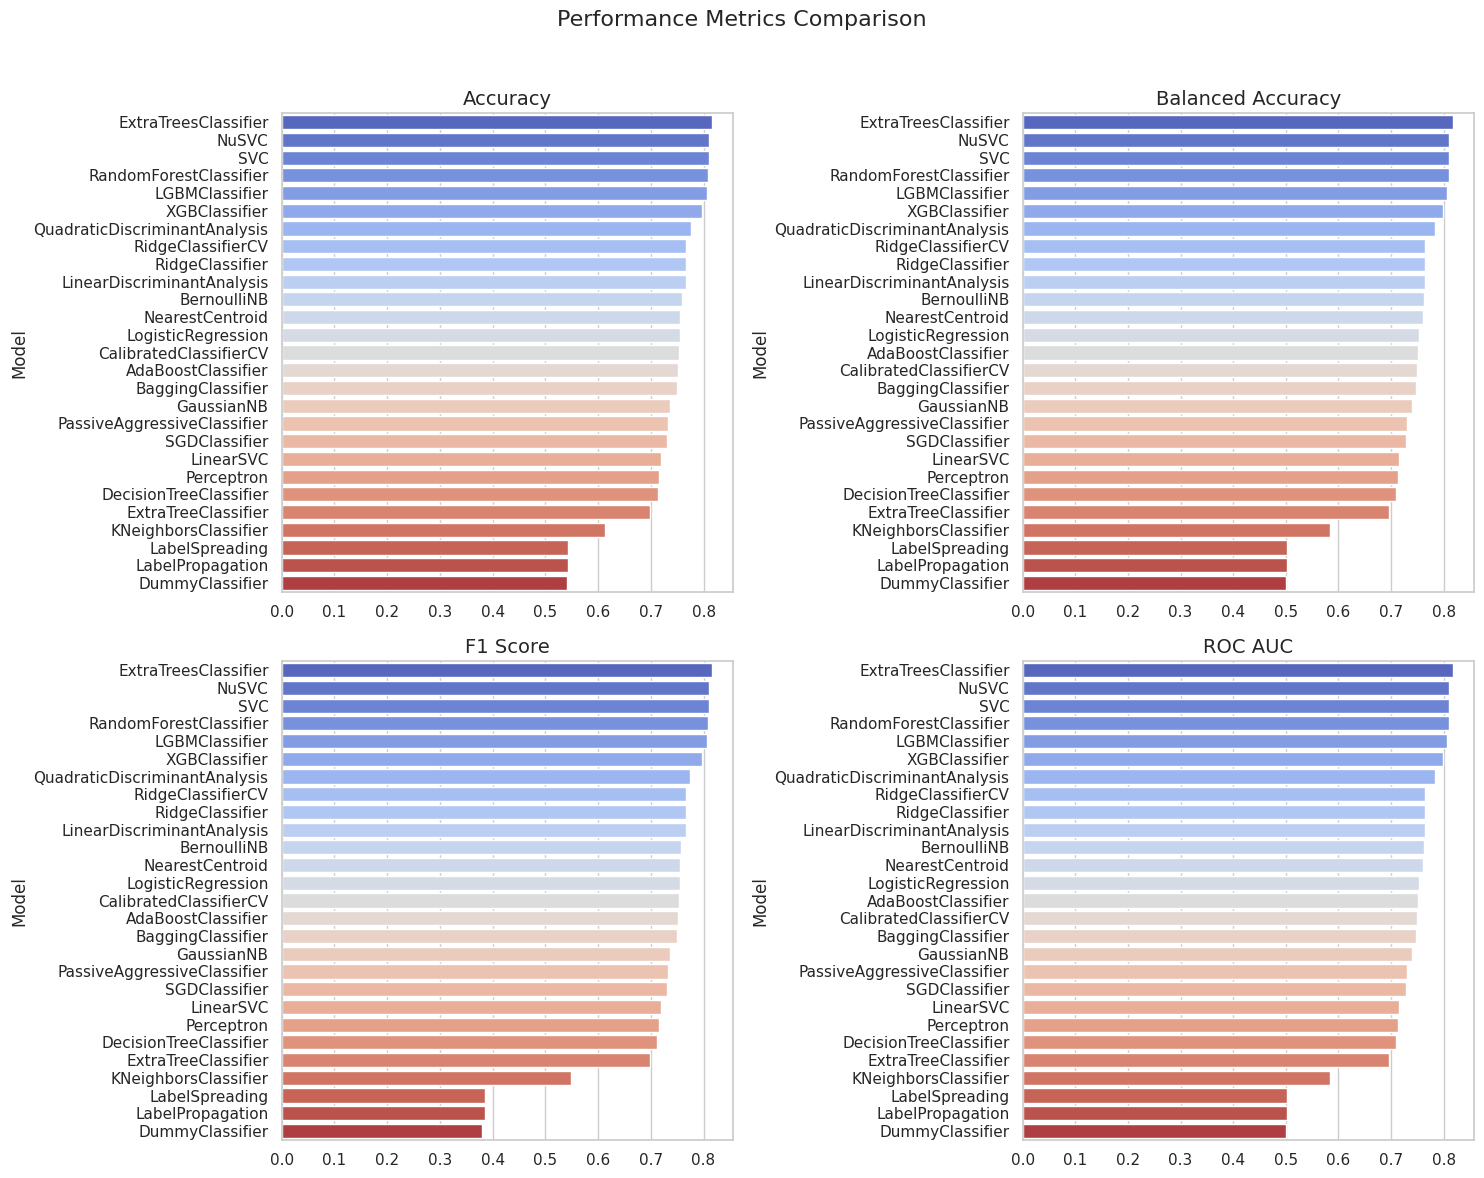

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Microsomeptract the model names and performance metrics from LazyClassifier's output
model_names = list(models.indMicrosomep)
accuracy = list(models['Accuracy'])
balanced_accuracy = list(models['Balanced Accuracy'])
f1_score = list(models['F1 Score'])
roc_auc = list(models['ROC AUC'])

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'Balanced Accuracy': balanced_accuracy,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc
})

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Performance Metrics Comparison', fontsize=16)

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', data=metrics_df.sort_values(by='Accuracy', ascending=False), ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Accuracy', fontsize=14)
axes[0, 0].set_xlabel('')

# Plot Balanced Accuracy
sns.barplot(x='Balanced Accuracy', y='Model', data=metrics_df.sort_values(by='Balanced Accuracy', ascending=False), ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Balanced Accuracy', fontsize=14)
axes[0, 1].set_xlabel('')

# Plot F1 Score
sns.barplot(x='F1 Score', y='Model', data=metrics_df.sort_values(by='F1 Score', ascending=False), ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('F1 Score', fontsize=14)
axes[1, 0].set_xlabel('')

# Plot ROC AUC
sns.barplot(x='ROC AUC', y='Model', data=metrics_df.sort_values(by='ROC AUC', ascending=False), ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('ROC AUC', fontsize=14)
axes[1, 1].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()



In [10]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Initialize ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()


Before executing the code block:
Current CPU Usage: 8.8%
Current RAM Usage: 43.0%

Cross-validation scores: [0.69206475 0.67982629 0.7639163  0.71061982 0.63403079]
Average accuracy: 0.6960915909988156
Standard deviation of accuracy: 0.04229321264789666

After executing the code block:
Current CPU Usage: 16.9%
Current RAM Usage: 42.1%



Number of features required to reach 95% cumulative importance: 1433


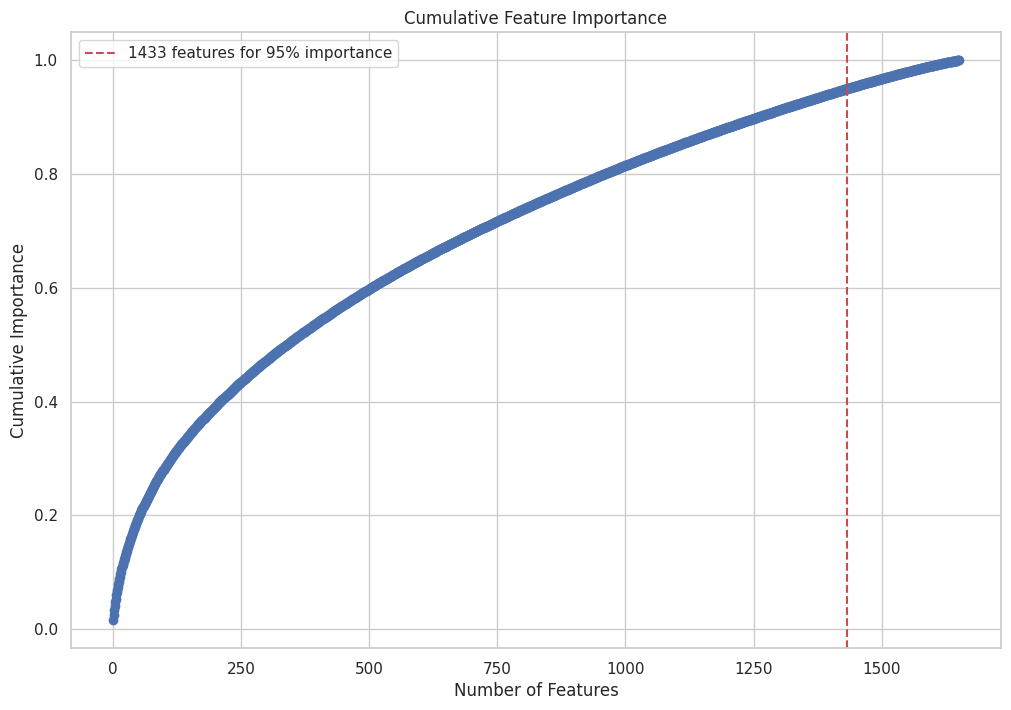

In [ ]:
# Calculate cumulative feature importance
cumulative_importance = np.cumsum(importances[sorted_indices])

# Find the number of features needed to reach or exceed 95% cumulative importance
num_features_95_percent = np.where(cumulative_importance >= 0.95)[0][0] + 1  # +1 because indices start from 0

print(f"Number of features required to reach 95% cumulative importance: {num_features_95_percent}")

# Plot cumulative feature importance
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.axvline(x=num_features_95_percent, color='r', linestyle='--', label=f'{num_features_95_percent} features for 95% importance')
plt.legend()
plt.grid(True)
plt.show()


# Hydration Free Energy binding rate prediction

In [13]:
from tdc.single_pred import ADME
data = ADME(name = 'HydrationFreeEnergy_FreeSolv')
df = data.get_data()

Found local copy...
Loading...
Done!


In [14]:
df

,Drug_ID,Drug,Y
0,"4-methoxy-N,N-dimethyl-benzamide",COc1ccc(C(=O)N(C)C)cc1,-11.01
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87
2,3-methylbut-1-ene,C=CC(C)C,1.83
3,2-ethylpyrazine,CCc1cnccn1,-5.45
4,heptan-1-ol,CCCCCCCO,-4.21
...,...,...,...
637,methyl octanoate,CCCCCCCC(=O)OC,-2.04
638,pyrrolidine,C1CCNC1,-5.48
639,4-hydroxybenzaldehyde,O=Cc1ccc(O)cc1,-8.83
640,1-chloroheptane,CCCCCCCCl,0.29


In [15]:
df.to_csv('Raw_data_HFE.csv', index=False)

Before executing the code block:
Current CPU Usage: 7.3%
Current RAM Usage: 41.6%



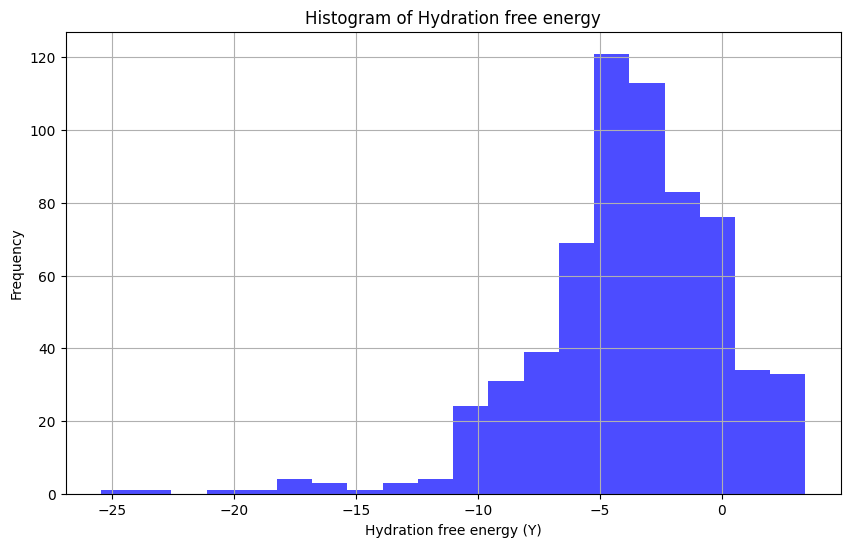

Number of empty Y values: 0
Number of empty Drug values: 0
Number of duplicate Drug_ID: 0
Number of duplicate SMILES: 0
Number of rows before preprocessing: 642
Number of columns before preprocessing: 3
Number of rows after preprocessing: 642
Number of columns after preprocessing: 3

After executing the code block:
Current CPU Usage: 38.4%
Current RAM Usage: 41.6%



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Create a copy of the original DataFrame
df2 = df.copy()

# 1. Histogram displaying the range of the data (Y) column
plt.figure(figsize=(10, 6))
plt.hist(df2['Y'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Hydration free energy (Y)')
plt.ylabel('Frequency')
plt.title('Histogram of Hydration free energy')
plt.grid(True)
plt.show()

# 2. Data preprocessing
# Check for empty Y values
print("Number of empty Y values:", df2['Y'].isnull().sum())

# Check for empty Drug
print("Number of empty Drug values:", df2['Drug'].isnull().sum())

# Check for duplicate drug_id
duplicate_drug_id = df2['Drug_ID'].duplicated().sum()
print("Number of duplicate Drug_ID:", duplicate_drug_id)

# Check for duplicate smiles (assuming Drug is the SMILES representation)
duplicate_smiles = df2['Drug'].duplicated().sum()
print("Number of duplicate SMILES:", duplicate_smiles)

# Remove duplicates based on Drug_ID
df2.drop_duplicates(subset=['Drug_ID'], inplace=True)

# 3. Display the number of rows and columns before preprocessing and after preprocessing
print("Number of rows before preprocessing:", len(df['Drug_ID']))
print("Number of columns before preprocessing:", len(df.keys()))

print("Number of rows after preprocessing:", len(df2))
print("Number of columns after preprocessing:", len(df2.columns))

# 4. Save the data in a CSV called preprocessed.csv
df2.to_csv('preprocessed_HFE.csv', index=False)

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()



In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Remove rows with missing or invalid values in 'Drug' and 'Y' columns
df2 = pd.read_csv('preprocessed_HFE.csv')
df2_clean = df2.dropna(subset=['Drug', 'Y']).copy()

# Extract 'Drug' and 'Y' columns
df2_subset = df2_clean[['Drug', 'Y']].copy()

# Convert Drug to Morgan fingerprints of nBits 2048 and radius of 3
def calculate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [0]*2048  # Return zero vector for invalid SMILES
    else:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)
        return np.array(fp)

# Apply the function to each row of the 'Drug' column
df2_subset['Morgan_FP'] = df2_subset['Drug'].apply(calculate_morgan_fingerprint)

# Expand the 'Morgan_FP' column into 2048 separate columns
morgan_fp_df = pd.DataFrame(df2_subset['Morgan_FP'].to_list(), columns=[f'Bit_{i+1}' for i in range(2048)])

# Combine the expanded Morgan fingerprints with the 'Y' variable
combined_df = pd.concat([morgan_fp_df, df2_subset['Y']], axis=1)

# Drop rows where all the Morgan fingerprints are zero vectors
combined_df = combined_df[(combined_df.iloc[:, :-1] != 0).any(axis=1)]

# Save the combined DataFrame to a CSV file named 'Morgan_Expanded.csv'
combined_df.to_csv('Morgan_HFE.csv', index=False)

# Display the final combined DataFrame
print(combined_df)

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()


Before executing the code block:
Current CPU Usage: 4.4%
Current RAM Usage: 31.4%

     Bit_1  Bit_2  Bit_3  Bit_4  Bit_5  Bit_6  Bit_7  Bit_8  Bit_9  Bit_10  \
0        0      0      0      0      0      0      0      0      0       0   
1        0      0      0      0      0      0      0      0      0       0   
2        0      1      0      0      0      0      0      0      0       0   
3        0      0      0      0      0      0      0      0      0       0   
4        0      0      0      0      0      0      0      0      0       0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
637      0      0      0      0      0      0      0      0      0       0   
638      0      0      0      0      0      0      0      0      0       0   
639      0      0      0      0      0      0      0      0      0       0   
640      0      0      0      0      0      0      0      0      0       0   
641      0      0      0      0      0      0      0      0

In [2]:
combined_df.Y.describe()

count    642.000000
mean      -3.803006
std        3.847820
min      -25.470000
25%       -5.727500
50%       -3.530000
75%       -1.215000
max        3.430000
Name: Y, dtype: float64

Before executing the code block:
Current CPU Usage: 7.6%
Current RAM Usage: 31.6%

Number of selected features after reduction: 318
R-Squared with reduced features: 0.76
RMSE with reduced features: 1.73


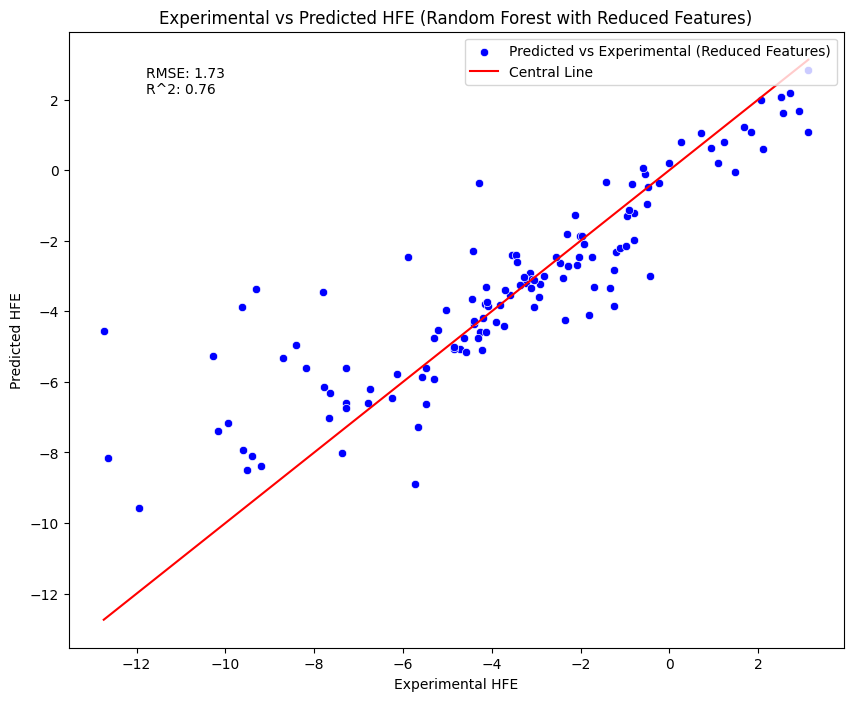


After executing the code block:
Current CPU Usage: 22.1%
Current RAM Usage: 31.9%



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import psutil

# Function to monitor and print RAM and CPU usage
def monitor_system_metrics():
    # Get CPU usage
    cpu_percent = psutil.cpu_percent()
    
    # Get RAM usage
    ram_percent = psutil.virtual_memory().percent
    
    print(f"Current CPU Usage: {cpu_percent}%")
    print(f"Current RAM Usage: {ram_percent}%\n")

# Monitor system metrics before executing the code block
print("Before executing the code block:")
monitor_system_metrics()

# Drop rows with values less than -15 in the target variable (Y)
combined_df = combined_df[combined_df['Y'] >= -15]

# Separate features (X) and target variable (y)
X = combined_df.drop('Y', axis=1)
y = combined_df['Y']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest regression model
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X_train, y_train)

# Extract feature importances and sort them
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Calculate cumulative feature importance
cumulative_importance = np.cumsum(importances[indices])

# Find the number of features needed to reach or exceed 95% cumulative importance
num_features_95_percent = np.where(cumulative_importance >= 0.95)[0][0] + 1  # +1 because indices start from 0

# Select the top N features that explain 95% of the model
selected_features = X.columns[indices][:num_features_95_percent]

# Print the number of selected features after reduction
print(f"Number of selected features after reduction: {len(selected_features)}")

# Select only the top N features
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# Fit the model with reduced features
rf_model_reduced = RandomForestRegressor()
rf_model_reduced.fit(X_train_reduced, y_train)

# Predict on the test set with reduced features
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Calculate RMSE and R^2 for Random Forest with reduced features
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"R-Squared with reduced features: {r2_reduced:.2f}")
print(f"RMSE with reduced features: {rmse_reduced:.2f}")

# Create the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_reduced, color='blue', label='Predicted vs Experimental (Reduced Features)')
sns.lineplot(x=y_test, y=y_test, color='red', label='Central Line')
plt.xlabel('Experimental HFE')
plt.ylabel('Predicted HFE')
plt.title('Experimental vs Predicted HFE (Random Forest with Reduced Features)')
plt.text(0.1, 0.9, f"RMSE: {rmse_reduced:.2f}\nR^2: {r2_reduced:.2f}", transform=plt.gca().transAxes)
plt.legend(loc='upper right') 
plt.show()

# Monitor system metrics after executing the code block
print("\nAfter executing the code block:")
monitor_system_metrics()


Number of features required to reach 95% cumulative importance: 327


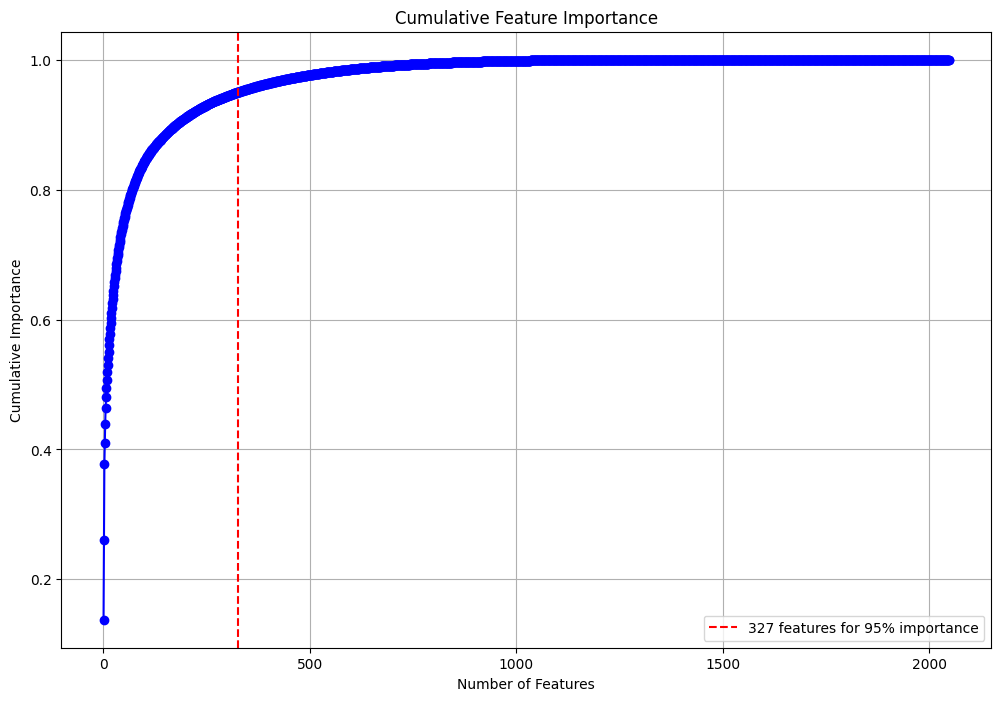

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf_model' is your trained Random Forest regression model
# Extract feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Calculate cumulative feature importance
cumulative_importance = np.cumsum(importances[sorted_indices])

# Find the number of features needed to reach or exceed 95% cumulative importance
num_features_95_percent = np.where(cumulative_importance >= 0.95)[0][0] + 1  # +1 because indices start from 0

print(f"Number of features required to reach 95% cumulative importance: {num_features_95_percent}")

# Plot cumulative feature importance
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.axvline(x=num_features_95_percent, color='r', linestyle='--', label=f'{num_features_95_percent} features for 95% importance')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import joblib

# Export selected features to a text file
with open('selected_features_HFE.txt', 'w') as file:
    for feature in selected_features:
        file.write(f"{feature}\n")

# Save the trained Random Forest model to a .pkl file
joblib.dump(rf_model_reduced, 'RF_model_HFE.pkl')


['RF_model_HFE.pkl']